## Contagem de palavras do texto Sherlock

In [2]:
# Instalando Pyspark

In [2]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 26 kB/s  eta 0:00:01    |████                            | 35.5 MB 1.7 MB/s eta 0:02:28     |███████▊                        | 68.1 MB 2.5 MB/s eta 0:01:26     |██████████████▎                 | 126.0 MB 2.2 MB/s eta 0:01:12     |██████████████████▋             | 163.9 MB 1.8 MB/s eta 0:01:06     |███████████████████▊            | 173.7 MB 2.4 MB/s eta 0:00:46     |██████████████████████          | 193.0 MB 8.1 MB/s eta 0:00:11     |███████████████████████▊        | 208.7 MB 3.1 MB/s eta 0:00:24     |████████████████████████        | 211.1 MB 3.0 MB/s eta 0:00:24     |█████████████████████████       | 218.9 MB 5.1 MB/s eta 0:00:13     |██████████████████████████████▏ | 265.6 MB 3.2 MB/s eta 0:00:05
     |████████████████████████████████| 198 kB 2.3 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805913 sha256=ab2cbe8060600fb1ef6bf9ca0daa266b11b5f11aceecd9bbd31a42a15e28cfd7
  Stored in dir

In [3]:
from pyspark import SparkContext, SparkConf

In [3]:
# Criando uma app com nome WordCount

In [4]:
conf = SparkConf().setAppName("WordCount")

In [4]:
# Instancia o SparkContext

In [5]:
sc = SparkContext.getOrCreate()

21/11/13 23:23:41 WARN Utils: Your hostname, debian resolves to a loopback address: 127.0.1.1; using 192.168.0.105 instead (on interface enp0s3)
21/11/13 23:23:41 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/11/13 23:23:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [5]:
# Lendo o arquivo texto e transformando para um RDD

In [6]:
file_in = sc.textFile('sherlock.txt')


In [6]:
# Verificando o número de linhas do arquivo

In [7]:
print('Número de linhas no arquivo: %s' % file_in.count())

Número de linhas no arquivo: 12303


In [8]:
from operator import add

In [7]:
# Utilizando as funções Map e Reduce

In [9]:
chars = file_in.map(lambda s: len(s)).reduce(add)

In [10]:
print('Número de caracteres no arquivo: %s' % chars)


Número de caracteres no arquivo: 569228


In [11]:
import re

In [8]:
# Quantidades de palavras

In [12]:
words = file_in.flatMap(lambda line: re.split('\W+', line.lower().strip()))

In [9]:
# Palavras acima de 3 letras

In [13]:
words = words.filter(lambda x: len(x) > 3)

In [14]:
words = words.map(lambda w: (w,1))

In [15]:
words = words.reduceByKey(add)

In [16]:
words.collect()

[('project', 89),
 ('gutenberg', 98),
 ('ebook', 13),
 ('adventures', 10),
 ('sherlock', 101),
 ('holmes', 466),
 ('arthur', 23),
 ('conan', 3),
 ('doyle', 3),
 ('this', 533),
 ('anyone', 29),
 ('anywhere', 4),
 ('united', 18),
 ('states', 26),
 ('most', 95),
 ('other', 164),
 ('parts', 6),
 ('world', 17),
 ('cost', 6),
 ('with', 877),
 ('almost', 20),
 ('restrictions', 2),
 ('whatsoever', 2),
 ('copy', 14),
 ('give', 64),
 ('away', 109),
 ('under', 49),
 ('terms', 25),
 ('license', 20),
 ('included', 4),
 ('online', 4),
 ('located', 7),
 ('will', 271),
 ('have', 931),
 ('check', 7),
 ('laws', 10),
 ('country', 39),
 ('where', 126),
 ('before', 168),
 ('using', 10),
 ('title', 3),
 ('author', 1),
 ('release', 1),
 ('date', 11),
 ('november', 1),
 ('2002', 1),
 ('1661', 1),
 ('recently', 3),
 ('updated', 2),
 ('2019', 1),
 ('language', 2),
 ('english', 10),
 ('character', 21),
 ('encoding', 1),
 ('produced', 4),
 ('anonymous', 1),
 ('volunteer', 2),
 ('jose', 1),
 ('menendez', 1),
 ('st

In [10]:
# Organizar as palavras

In [23]:
wordsS = words.map(lambda x:(x[1],x[0])).sortByKey(False)

In [24]:
wordsS.take(10)

[(1767, 'that'),
 (931, 'have'),
 (877, 'with'),
 (778, 'which'),
 (533, 'this'),
 (517, 'there'),
 (512, 'from'),
 (486, 'said'),
 (467, 'upon'),
 (466, 'holmes')]

## Demonstrar de forma grafica as 10 palavras mais usadas no texto

In [25]:
!pip3 install matplotlib

In [26]:
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline

In [28]:
def histograma(words):
    dados = dict(words)
    y,x = zip(*sorted(zip(dados.values(),[str(i) for i in dados.keys()])))
    plt.barh(x, y, color='g')


In [29]:
wordsF = wordsS.map(lambda x:(x[1], x[0]))


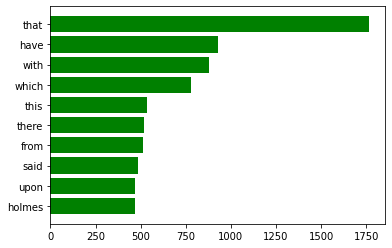

In [30]:
histograma(wordsF.take(10))